Source of theis notebook:
https://github.com/susanli2016/Machine-Learning-with-Python.git


<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Pandas</p><br>

*pandas* is a Python library for data analysis. It offers a number of data exploration, cleaning and transformation operations that are critical in working with data in Python. 

*pandas* build upon *numpy* and *scipy* providing easy-to-use data structures and data manipulation functions with integrated indexing.

The main data structures *pandas* provides are *Series* and *DataFrames*. After a brief introduction to these two data structures and data ingestion, the key features of *pandas* this notebook covers are:
* Generating descriptive statistics on data
* Data cleaning using built in pandas functions
* Frequent data operations for subsetting, filtering, insertion, deletion and aggregation of data
* Merging multiple datasets using dataframes
* Working with timestamps and time-series data

**Additional Recommended Resources:**
* *pandas* Documentation: http://pandas.pydata.org/pandas-docs/stable/
* *Python for Data Analysis* by Wes McKinney
* *Python Data Science Handbook* by Jake VanderPlas

Let's get started with our first *pandas* notebook!

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Import Libraries
</p>

In [223]:
import pandas as pd

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Introduction to pandas Data Structures</p>
<br>
*pandas* has two main data structures it uses, namely, *Series* and *DataFrames*. 

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas Series</p>

*pandas Series* one-dimensional labeled array. 


In [224]:
ser = pd.Series([100, 'foo', 300, 'bar', 500], ['tom', 'bob', 'nancy', 'dan', 'eric'])

In [225]:
ser

tom      100
bob      foo
nancy    300
dan      bar
eric     500
dtype: object

In [226]:
ser = pd.Series([100, 'foo', 300, 'bar', 500])

In [227]:
ser.index

RangeIndex(start=0, stop=5, step=1)

In [228]:
ser.loc[[0,1]]

0    100
1    foo
dtype: object

In [229]:
ser[[4, 3, 1]]

4    500
3    bar
1    foo
dtype: object

In [230]:
ser.iloc[2]

300

In [231]:
ser.iloc["nancy"]


TypeError: Cannot index by location index with a non-integer key

In [232]:
ser


0    100
1    foo
2    300
3    bar
4    500
dtype: object

In [233]:
'bob' in ser

False

In [234]:
'bob' in ser.index


False

In [235]:
'foo' in ser


False

In [236]:
'foo' in ser.values


True

In [244]:
ser

tom      100
bob      foo
nancy    300
dan      bar
eric     500
dtype: object

In [197]:
ser * 2

tom         200
bob      foofoo
nancy       600
dan      barbar
eric       1000
dtype: object

In [140]:
'hello'*2

'hellohello'

In [199]:
ser[['nancy','dan', 'eric']] ** 2

TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

In [17]:
ser

tom      100
bob      foo
nancy    300
dan      bar
eric     500
dtype: object

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas DataFrame</p>

*pandas DataFrame* is a 2-dimensional labeled data structure.

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from dictionary of Python Series</p>

In [200]:
d = {'one' : pd.Series([100., 200., 300.], index=['apple', 'ball', 'clock']),
     'two' : pd.Series([111., 222., 333., 4444.], index=['apple', 'ball', 'cerill', 'dancy'])}

In [202]:
df = pd.DataFrame(d)
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [203]:
df.index

Index(['apple', 'ball', 'cerill', 'clock', 'dancy'], dtype='object')

In [21]:
df.columns

Index(['one', 'two'], dtype='object')

In [204]:
pd.Series([100., 200., 300.], index=['apple', 'ball', 'clock','tfdwuke'])

ValueError: Length of values (3) does not match length of index (4)

In [205]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple','xxx'])

,one,two
dancy,NaN,4444.0
ball,200.0,222.0
apple,100.0,111.0
xxx,NaN,NaN


In [254]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'], columns=['two', 'five'])

,two,five
dancy,4444.0,NaN
ball,222.0,NaN
apple,111.0,NaN


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from list of Python dictionaries</p>

In [145]:
data = [{'alex': 1, 'joe': 2}, {'ema': 5, 'dora': 10, 'alice': 20}]

In [206]:
pd.DataFrame(data)

,alex,joe,ema,dora,alice
0,1.0,2.0,NaN,NaN,NaN
1,NaN,NaN,5.0,10.0,20.0


In [147]:
pd.DataFrame(data, index=['orange', 'red'])

,alex,joe,ema,dora,alice
orange,1.0,2.0,NaN,NaN,NaN
red,NaN,NaN,5.0,10.0,20.0


In [27]:
pd.DataFrame(data, columns=['joe', 'dora','alice'])

,joe,dora,alice
0,2.0,NaN,NaN
1,NaN,10.0,20.0


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Basic DataFrame operations</p>

In [148]:
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [149]:
type(df['one'])

pandas.core.series.Series

In [150]:
df['one'].dtype


dtype('float64')

In [207]:
df['threewetr'] = df['one'] * 2
df

,one,two,threewetr
apple,100.0,111.0,200.0
ball,200.0,222.0,400.0
cerill,NaN,333.0,NaN
clock,300.0,NaN,600.0
dancy,NaN,4444.0,NaN


In [152]:
df['ones'] =1

In [153]:
df

,one,two,threewetr,ones
apple,100.0,111.0,200.0,1
ball,200.0,222.0,400.0,1
cerill,NaN,333.0,NaN,1
clock,300.0,NaN,600.0,1
dancy,NaN,4444.0,NaN,1


In [208]:
df['flag'] = df['one'] > 250
df

,one,two,threewetr,flag
apple,100.0,111.0,200.0,False
ball,200.0,222.0,400.0,False
cerill,NaN,333.0,NaN,False
clock,300.0,NaN,600.0,True
dancy,NaN,4444.0,NaN,False


In [209]:
three = df.pop('threewetr')

In [210]:
type(three)

pandas.core.series.Series

In [158]:
df

,one,two,ones,flag
apple,100.0,111.0,1,False
ball,200.0,222.0,1,False
cerill,NaN,333.0,1,False
clock,300.0,NaN,1,True
dancy,NaN,4444.0,1,False


In [211]:
del df['two']

In [212]:
df

,one,flag
apple,100.0,False
ball,200.0,False
cerill,NaN,False
clock,300.0,True
dancy,NaN,False


In [213]:
df.insert(2, 'copy_of_one', df['one'])
df

,one,flag,copy_of_one
apple,100.0,False,100.0
ball,200.0,False,200.0
cerill,NaN,False,NaN
clock,300.0,True,300.0
dancy,NaN,False,NaN


In [162]:
df['one_upper_half'] = df['one'][:2]
df

,one,ones,copy_of_one,flag,one_upper_half
apple,100.0,1,100.0,False,100.0
ball,200.0,1,200.0,False,200.0
cerill,NaN,1,NaN,False,NaN
clock,300.0,1,300.0,True,NaN
dancy,NaN,1,NaN,False,NaN


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Case Study: Movie Data Analysis</p>
<br>This notebook uses a dataset from the MovieLens website. We will describe the dataset further as we explore with it using *pandas*. 

## Download the Dataset

Please note that **you will need to download the dataset**. Although the video for this notebook says that the data is in your folder, the folder turned out to be too large to fit on the edX platform due to size constraints.

Here are the links to the data source and location:
* **Data Source:** MovieLens web site (filename: ml-20m.zip)
* **Location:** https://grouplens.org/datasets/movielens/

Once the download completes, please make sure the data files are in a directory called *movielens* in your *Week-3-pandas* folder. 

Let us look at the files in this dataset using the UNIX command ls.


In [47]:
# Note: Adjust the name of the folder to match your local directory
! mkdir  ../data/movielens_data 
!ls ../data/movielens_data

In [50]:
!sh wget wget -P ./data/movielens_data/ https://grouplens.org/datasets/movielens/ml-20m.zip

/usr/local/bin/wget: /usr/local/bin/wget: cannot execute binary file


In [48]:
!cat ../data/movielens_data/movies.csv | wc -l

cat: ../data/movielens_data/movies.csv: No such file or directory
       0


In [46]:
!head -5 ../data/movielens_data/ratings.csv

head: ../data/movielens_data/ratings.csv: No such file or directory


In [52]:

import urllib.request

url = 'https://files.grouplens.org/datasets/movielens/ml-20m.zip'
filename = '../data/ml.zip'
urllib.request.urlretrieve(url, filename)


('../data/ml.zip', <http.client.HTTPMessage at 0x7fb0e1865520>)

In [53]:
import zipfile

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('../data')

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Use Pandas to Read the Dataset<br>
</p>
<br>
In this notebook, we will be using three CSV files:
* **ratings.csv :** *userId*,*movieId*,*rating*, *timestamp*
* **tags.csv :** *userId*,*movieId*, *tag*, *timestamp*
* **movies.csv :** *movieId*, *title*, *genres* <br>

Using the *read_csv* function in pandas, we will ingest these three files.

In [163]:
movies = pd.read_csv('../data/ml-20m/movies.csv', sep=',')
print(type(movies))
movies.head(15)

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [164]:
# Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

tags = pd.read_csv('../data/ml-20m/tags.csv', sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [165]:
ratings = pd.read_csv('../data/ml-20m/ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.head()

/var/folders/sp/j3p6g91d6dj8wzlq0vy4dw8r0000gn/T/ipykernel_96784/1714614032.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ratings = pd.read_csv('../data/ml-20m/ratings.csv', sep=',', parse_dates=['timestamp'])


,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [57]:
ratings.columns


Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [58]:
# For current analysis, we will remove timestamp (we will come back to it!)

del ratings['timestamp']
del tags['timestamp']

<h1 style="font-size:2em;color:#2467C0">Data Structures </h1>

<h1 style="font-size:1.5em;color:#2467C0">Series</h1>

In [214]:
#Extract 0th row: notice that it is in fact a Series

row_0 = tags.iloc[0]

In [216]:
type(row_0)

pandas.core.series.Series

In [217]:
row_0

userId                18
movieId             4141
tag          Mark Waters
timestamp     1240597180
Name: 0, dtype: object

In [170]:
col_0 = tags.iloc[:,0]
type(col_0)

pandas.core.series.Series

In [71]:
row_0

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object

In [72]:
col_0

0             18
1             65
2             65
3             65
4             65
           ...  
465559    138446
465560    138446
465561    138446
465562    138446
465563    138472
Name: userId, Length: 465564, dtype: int64

In [62]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [69]:
col_0.index

RangeIndex(start=0, stop=465564, step=1)

In [171]:
'userId' in row_0.index

True

In [172]:
row_0['userId']

18

In [65]:
'rating' in row_0

False

In [66]:
row_0.name

0

In [70]:
col_0.name

'userId'

In [289]:
row_0 = row_0.rename('first_row')
row_0.name

'first_row'

<h1 style="font-size:1.5em;color:#2467C0">DataFrames </h1>

In [218]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [74]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [75]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [76]:
# Extract row 0, 11, 2000 from DataFrame

tags.iloc[ [0,11,2000] ]

,userId,movieId,tag
0,18,4141,Mark Waters
11,65,1783,noir thriller
2000,910,68554,conspiracy theory


<h1 style="font-size:2em;color:#2467C0">Descriptive Statistics</h1>

Let's look how the ratings are distributed! 

In [219]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [221]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [78]:
type(ratings['rating'])

pandas.core.series.Series

In [81]:
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [82]:
a=ratings.describe()


In [83]:
a

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [ ]:
ratings['rating'].mean()

In [87]:
ratings.mean()==a.iloc['mean']

TypeError: Cannot index by location index with a non-integer key

In [88]:
ratings['rating'].min()

0.5

In [90]:
a.loc['min']['rating']

0.5

In [93]:
a['rating'].loc['min']


0.5

In [ ]:
ratings['rating'].max()

In [ ]:
ratings['rating'].std()

In [ ]:
ratings['rating'].mode()

In [94]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [176]:
filter_1 = ratings['rating'] > 5
print(filter_1)
filter_1.any()

0           False
1           False
2           False
3           False
4           False
            ...  
20000258    False
20000259    False
20000260    False
20000261    False
20000262    False
Name: rating, Length: 20000263, dtype: bool


False

In [96]:
filter_2 = ratings['rating'] > 0
filter_2.all()

True

<h1 style="font-size:2em;color:#2467C0">Data Cleaning: Handling Missing Data</h1>

In [100]:
movies.shape

(27278, 3)

In [177]:
movies.isnull()


,movieId,title,genres
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
27273,False,False,False
27274,False,False,False
27275,False,False,False
27276,False,False,False


In [103]:
#is any row NULL ?

movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

Thats nice ! No NULL values !

In [104]:
ratings.shape

(20000263, 3)

In [105]:
#is any row NULL ?

ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

Thats nice ! No NULL values !

In [106]:
tags.shape

(465564, 3)

In [107]:
#is any row NULL ?

tags.isnull().any()

userId     False
movieId    False
tag         True
dtype: bool

We have some tags which are NULL.

In [108]:
tags = tags.dropna()

In [109]:
#Check again: is any row NULL ?

tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

In [110]:
tags.shape

(465548, 3)

Thats nice ! No NULL values ! Notice the number of lines have reduced.

<h1 style="font-size:2em;color:#2467C0">Data Visualization</h1>

array([[<Axes: title={'center': 'rating'}>]], dtype=object)

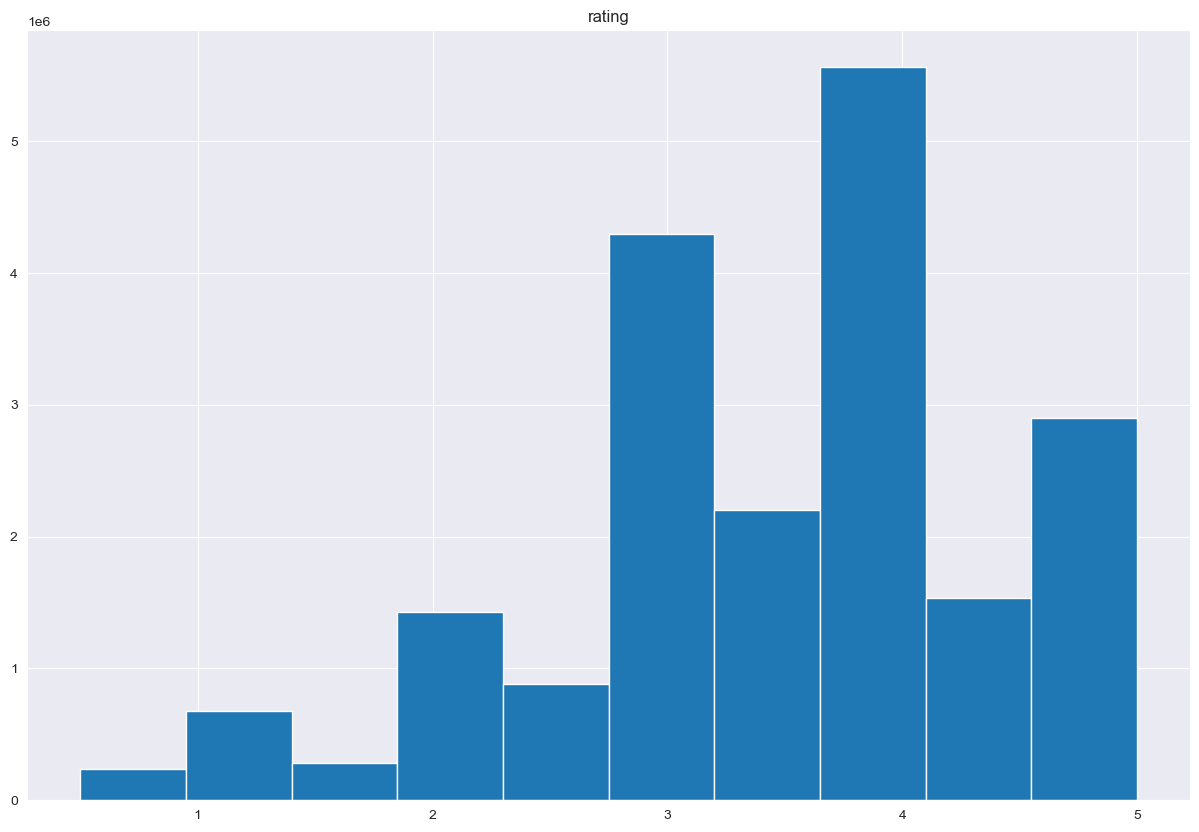

In [178]:
%matplotlib inline

ratings.hist(column='rating', figsize=(15,10))

In [113]:
ratings.tail()

,userId,movieId,rating
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


<Axes: >

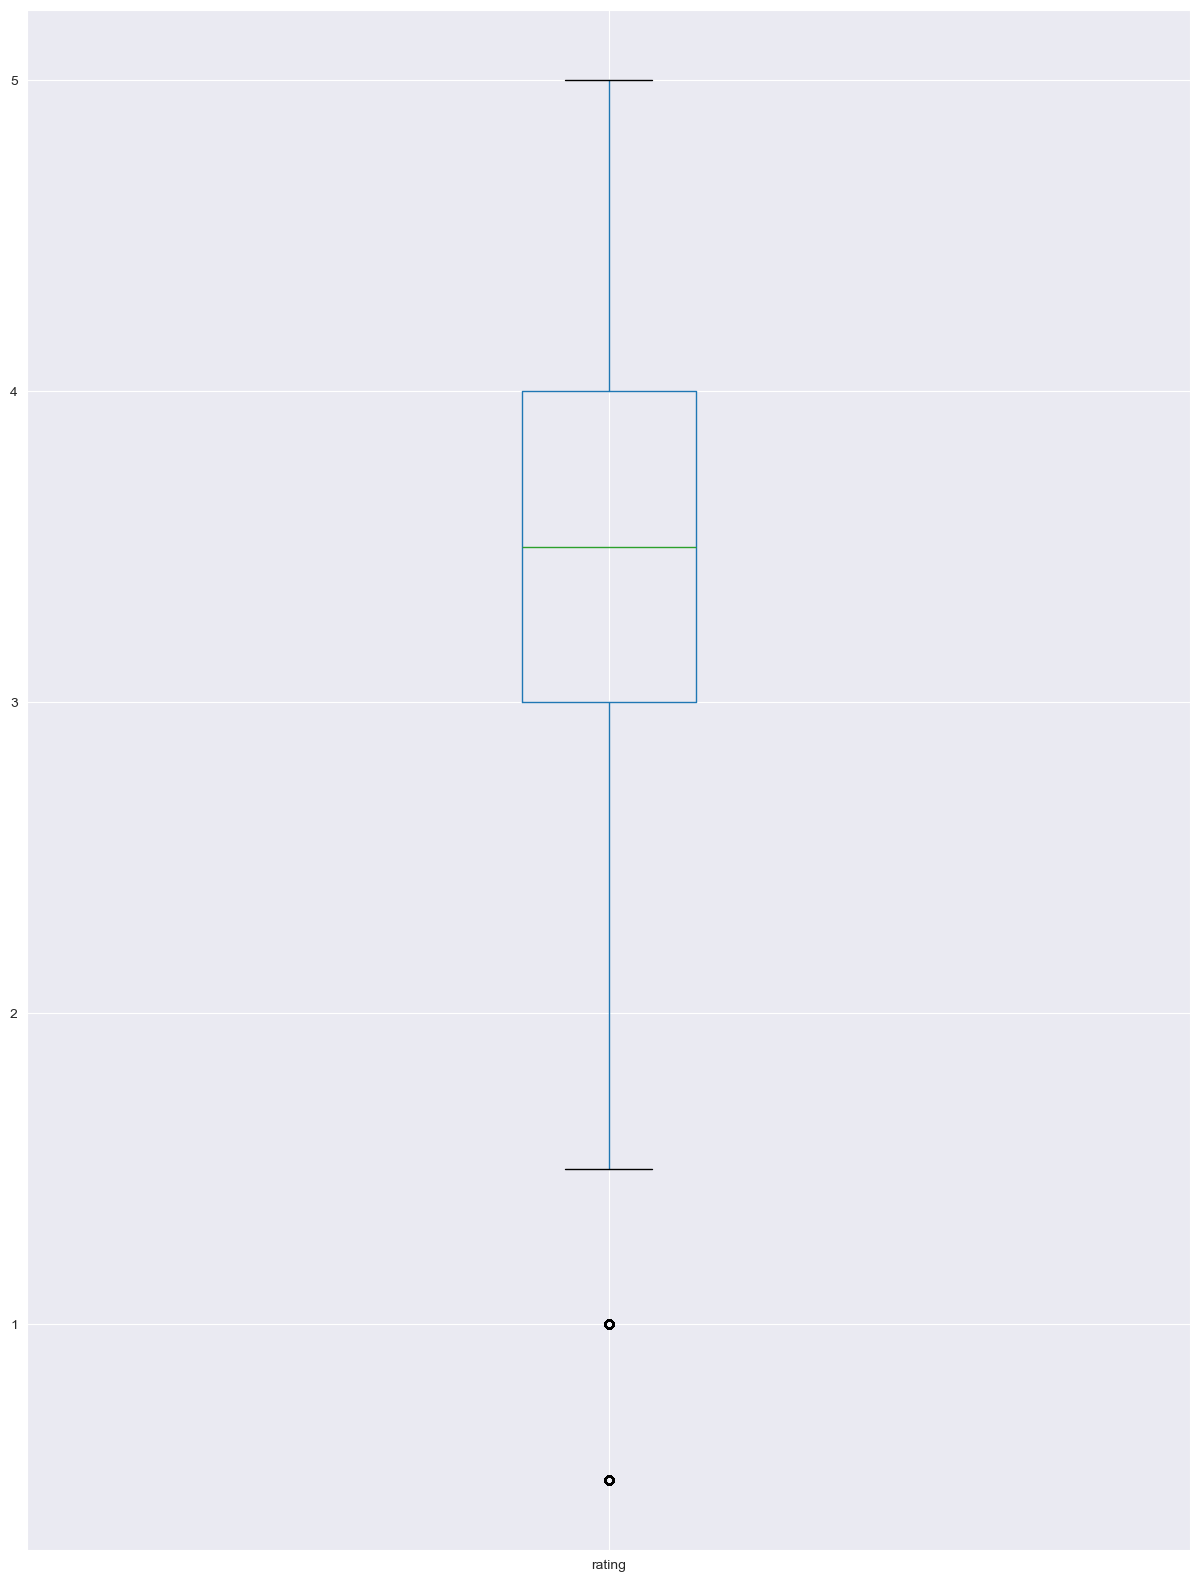

In [114]:
ratings.boxplot(column='rating', figsize=(15,20))

<h1 style="font-size:2em;color:#2467C0">Slicing Out Columns</h1>
 

In [179]:
tags['tag'].head(10)

0         Mark Waters
1           dark hero
2           dark hero
3       noir thriller
4           dark hero
5           bollywood
6    screwball comedy
7       noir thriller
8                mars
9            neo-noir
Name: tag, dtype: object

In [311]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [312]:
ratings[-10:]

,userId,movieId,rating,timestamp
25000085,162541,8983,4.5,1240953211
25000086,162541,31658,4.5,1240953287
25000087,162541,33794,4.0,1240951792
25000088,162541,41566,4.0,1240952749
25000089,162541,45517,4.5,1240953353
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434
25000094,162541,63876,5.0,1240952515


In [222]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [180]:
tag_counts = tags['tag'].value_counts()
tag_counts[-10:]

tag
missing child                    1
Ron Moore                        1
Citizen Kane                     1
mullet                           1
biker gang                       1
Paul Adelstein                   1
the wig                          1
killer fish                      1
genetically modified monsters    1
topless scene                    1
Name: count, dtype: int64

<Axes: xlabel='tag'>

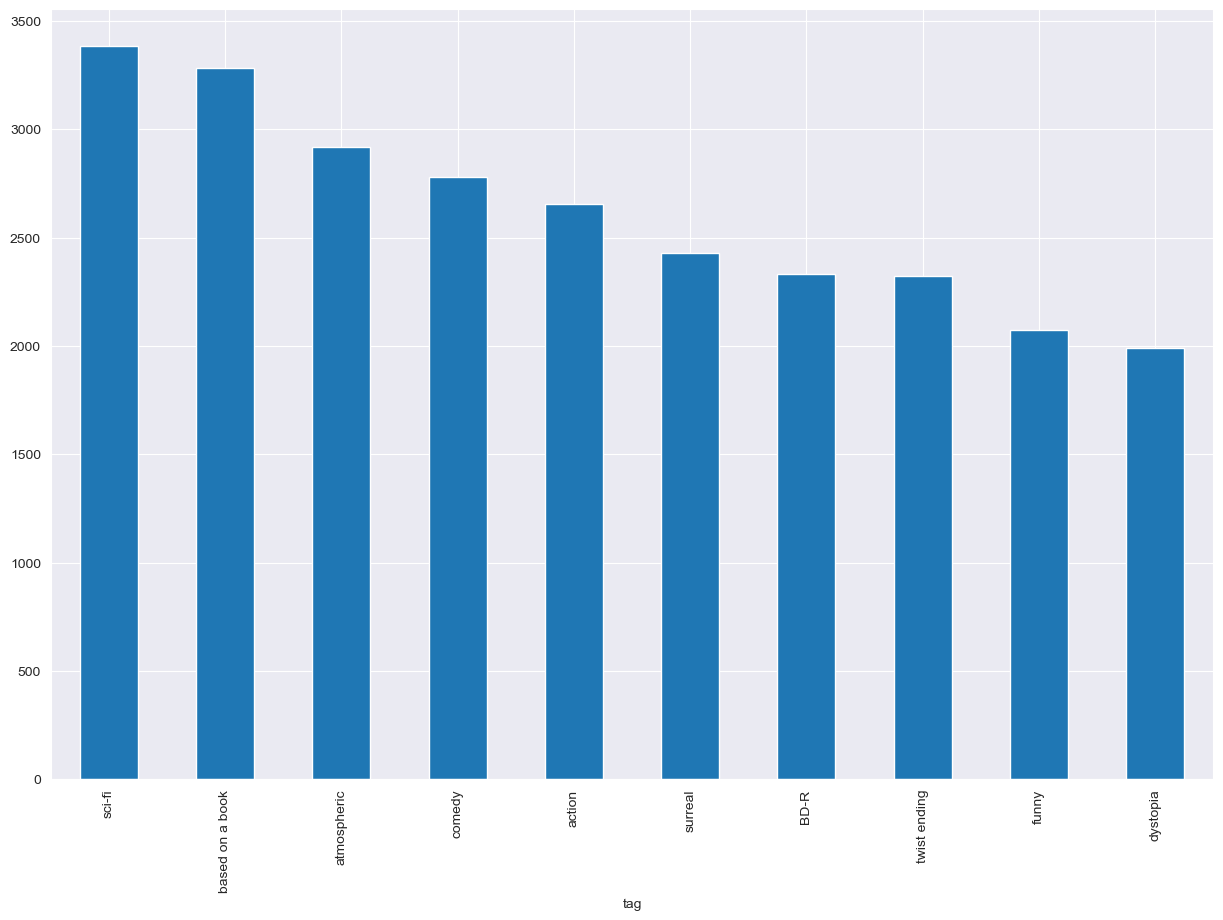

In [118]:
tag_counts[:10].plot(kind='bar', figsize=(15,10))

<h1 style="font-size:2em;color:#2467C0">Filters for Selecting Rows</h1>

In [115]:
is_highly_rated = ratings['rating'] >= 4.0

ratings[is_highly_rated][30:50]

,userId,movieId,rating
68,1,2021,4.0
69,1,2100,4.0
70,1,2118,4.0
71,1,2138,4.0
72,1,2140,4.0
73,1,2143,4.0
74,1,2173,4.0
75,1,2174,4.0
76,1,2193,4.0
79,1,2288,4.0


In [119]:
is_animation = movies['genres'].str.contains('Animation')

movies[is_animation][5:15]

,movieId,title,genres
310,313,"Swan Princess, The (1994)",Animation|Children
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
388,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
547,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
553,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy
582,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
588,594,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical
589,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX
590,596,Pinocchio (1940),Animation|Children|Fantasy|Musical
604,610,Heavy Metal (1981),Action|Adventure|Animation|Horror|Sci-Fi


In [120]:
movies[is_animation].head(15)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children
310,313,"Swan Princess, The (1994)",Animation|Children
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
388,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
547,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
553,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy


<h1 style="font-size:2em;color:#2467C0">Group By and Aggregate </h1>

In [315]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,393068
1.0,776815
1.5,399490
2.0,1640868
2.5,1262797
3.0,4896928
3.5,3177318
4.0,6639798
4.5,2200539


In [316]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.head()

,rating
movieId,
1,3.893708
2,3.251527
3,3.142028
4,2.853547
5,3.058434


In [317]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

,rating
movieId,
1,57309
2,24228
3,11804
4,2523
5,11714


In [ ]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.tail()

<h1 style="font-size:2em;color:#2467C0">Merge Dataframes</h1>

In [ ]:
tags.head()

In [ ]:
movies.head()

In [ ]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

More examples: http://pandas.pydata.org/pandas-docs/stable/merging.html

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>


Combine aggreagation, merging, and filters to get useful analytics
</p>

In [ ]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

In [ ]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

In [ ]:
is_highly_rated = box_office['rating'] >= 4.0

box_office[is_highly_rated][-5:]

In [ ]:
is_comedy = box_office['genres'].str.contains('Comedy')

box_office[is_comedy][:5]

In [ ]:
box_office[is_comedy & is_highly_rated][-5:]

<h1 style="font-size:2em;color:#2467C0">Vectorized String Operations</h1>


In [ ]:
movies.head()

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Split 'genres' into multiple columns

<br> </p>

In [ ]:
movie_genres = movies['genres'].str.split('|', expand=True)

In [ ]:
type(movie_genres)

In [ ]:
movie_genres[:11]

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Add a new column for comedy genre flag

<br> </p>

In [ ]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')

In [ ]:
movie_genres[:10]

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Extract year from title e.g. (1995)

<br> </p>

In [ ]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [ ]:
movies.tail()

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

More here: http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods
<br> </p>

<h1 style="font-size:2em;color:#2467C0">Parsing Timestamps</h1>

Timestamps are common in sensor data or other time series datasets.
Let us revisit the *tags.csv* dataset and read the timestamps!


In [320]:
tags = pd.read_csv('./movielens_data/tags.csv', sep=',',  parse_dates=['timestamp'])

In [321]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp    object
dtype: object

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Unix time / POSIX time / epoch time records 
time in seconds <br> since midnight Coordinated Universal Time (UTC) of January 1, 1970
</p>

In [322]:
tags.head(5)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [323]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Data Type datetime64[ns] maps to either <M8[ns] or >M8[ns] depending on the hardware

</p>

In [324]:

tags['parsed_time'].dtype

dtype('<M8[ns]')

In [325]:
tags.head(2)

,userId,movieId,tag,timestamp,parsed_time
0,3,260,classic,1439472355,2015-08-13 13:25:55
1,3,260,sci-fi,1439472256,2015-08-13 13:24:16


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Selecting rows based on timestamps
</p>

In [ ]:
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]

tags.shape, selected_rows.shape

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Sorting the table using the timestamps
</p>

In [ ]:
tags.sort_values(by='parsed_time', ascending=True)[:10]

<h1 style="font-size:2em;color:#2467C0">Average Movie Ratings over Time </h1>
## Are Movie ratings related to the year of launch?

In [ ]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

In [ ]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()
joined.corr()

In [ ]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average[:10]

In [ ]:
yearly_average[-20:].plot(x='year', y='rating', figsize=(15,10), grid=True)

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Do some years look better for the boxoffice movies than others? <br><br>

Does any data point seem like an outlier in some sense?

</p>